# import Libraries 

In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../cell-images-for-detecting-malaria/"))

['.ipynb_checkpoints', 'cell_images', 'Untitled.ipynb']


In [36]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical

# Data Preprocessing 

In [37]:
parasitized_data = os.listdir('../cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('../cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png', 'C100P61ThinF_IMG_20150918_144104_cell_167.png', 'C100P61ThinF_IMG_20150918_144104_cell_168.png', 'C100P61ThinF_IMG_20150918_144104_cell_169.png', 'C100P61ThinF_IMG_20150918_144104_cell_170.png', 'C100P61ThinF_IMG_20150918_144104_cell_171.png']


['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_131.png', 'C100P61ThinF_IMG_20150918_144104_cell_144.png', 'C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_25.png', 'C100P61ThinF_IMG_20150918_144104_cell_34.png', 'C100P61ThinF_IMG_20150918_144104_cell_48.png', 'C100P61ThinF_IMG_20150918_144104_cell_65.png', 'C100P61ThinF_IMG_20150918_144348_cell_108.png', 'C100P61ThinF_IMG_20150918_144348_cell_120.png']


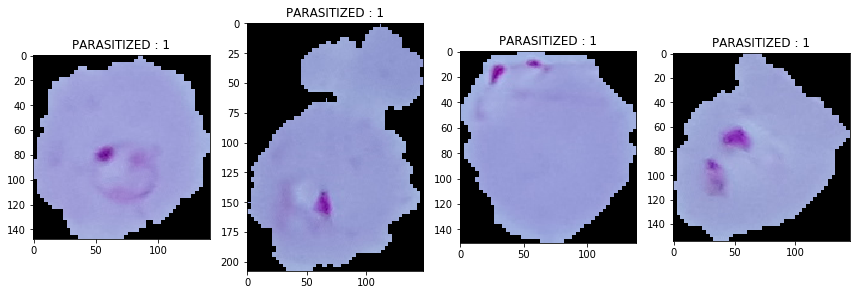

In [38]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

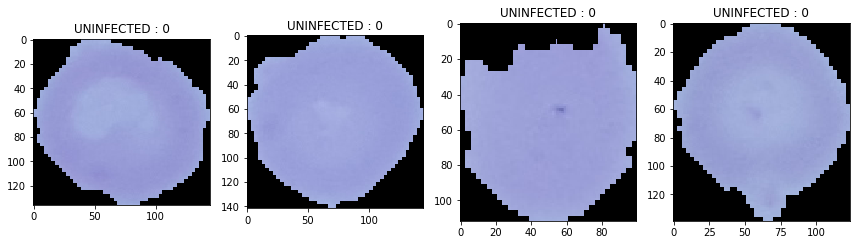

In [39]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

In [40]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('../cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('../cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

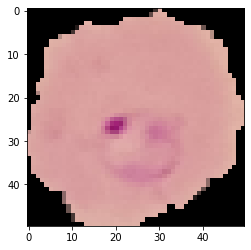

In [41]:
plt.imshow(data[0])
plt.show()

# Splitting data 

In [42]:
image_data = np.array(data)
labels = np.array(labels)

In [43]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [46]:
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [47]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22046, 2)
SHAPE OF TESTING LABELS : (5512, 2)


# Import Deep Learning libraries: Tensorflow, Keras

In [49]:
import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K

from tensorflow.keras import optimizers

# Define a CNN

In [50]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [51]:
#instantiate the model
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        1

# Training and Evaluation

In [52]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [53]:
#fit the model onto the dataset
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Train on 22046 samples
Epoch 1/20
22046/22046 [==============================] - 34s 2ms/sample - loss: 0.5721 - accuracy: 0.7635
Epoch 2/20
22046/22046 [==============================] - 20s 886us/sample - loss: 0.2243 - accuracy: 0.9183
Epoch 3/20
22046/22046 [==============================] - 19s 883us/sample - loss: 0.1968 - accuracy: 0.9316
Epoch 4/20
22046/22046 [==============================] - 20s 886us/sample - loss: 0.1807 - accuracy: 0.9407
Epoch 5/20
22046/22046 [==============================] - 19s 883us/sample - loss: 0.1696 - accuracy: 0.9424
Epoch 6/20
22046/22046 [==============================] - 19s 874us/sample - loss: 0.1656 - accuracy: 0.9451
Epoch 7/20
22046/22046 [==============================] - 19s 878us/sample - loss: 0.1608 - accuracy: 0.9482
Epoch 8/20
22046/22046 [==============================] - 19s 881us/sample - loss: 0.1539 - accuracy: 0.9498
Epoch 9/20
22046/22046 [==============================] - 20s 891us/sample - loss: 0.1522 - accuracy: 0.950

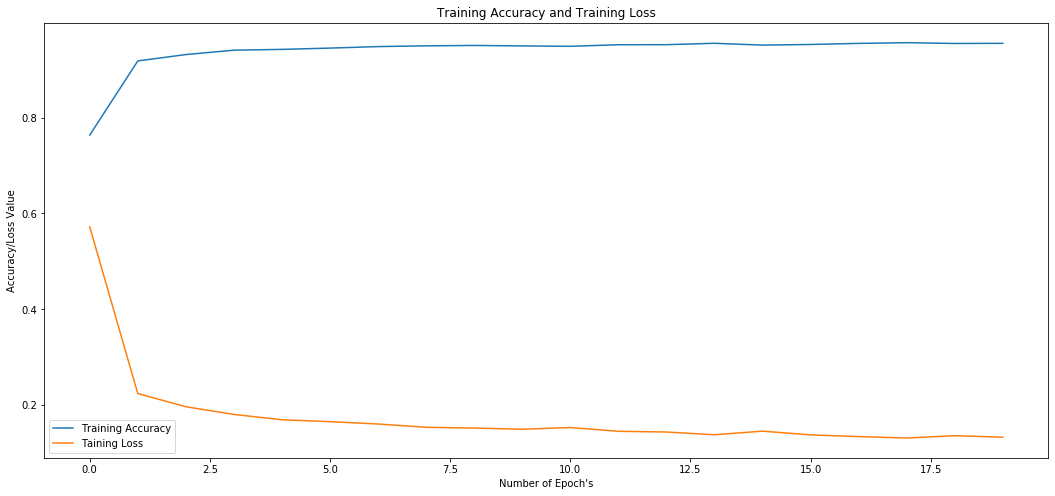

In [56]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")
plt.show()

In [61]:
#evaluate the model on test data
predictions = model.evaluate(x_test, y_test)

5512/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [62]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.19918012080500538
ACCURACY : 0.9312409162521362


# WITH DATA AUGMENTATION

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [66]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)

In [68]:
#calling the same model as above
model_aug = CNNbuild(height = height, width = width, classes = classes, channels = channels)

## Training and eveluating the augmented model

In [69]:
#compile the model
optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
model_aug.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])

In [72]:
#fit the model on the augmented dataset
h_aug = model_aug.fit_generator(train_generator, steps_per_epoch = len(x_train) // 64, epochs = 30)

Epoch 1/30
344/344 [==============================] - 53s 154ms/step - loss: 0.3438 - accuracy: 0.8618
Epoch 2/30
344/344 [==============================] - 58s 168ms/step - loss: 0.3155 - accuracy: 0.8787
Epoch 3/30
344/344 [==============================] - 52s 152ms/step - loss: 0.3015 - accuracy: 0.8867
Epoch 4/30
344/344 [==============================] - 53s 154ms/step - loss: 0.2888 - accuracy: 0.8943
Epoch 5/30
344/344 [==============================] - 51s 150ms/step - loss: 0.2788 - accuracy: 0.8986
Epoch 6/30
344/344 [==============================] - 51s 148ms/step - loss: 0.2769 - accuracy: 0.8996
Epoch 7/30
344/344 [==============================] - 52s 152ms/step - loss: 0.2601 - accuracy: 0.9055
Epoch 8/30
344/344 [==============================] - 52s 151ms/step - loss: 0.2601 - accuracy: 0.9066
Epoch 9/30
344/344 [==============================] - 51s 149ms/step - loss: 0.2633 - accuracy: 0.9053
Epoch 10/30
344/344 [==============================] - 54s 157ms/step - l

In [73]:
#evaluate the model on augmented test data
predict = model_aug.evaluate_generator(val_generator, steps = 5)

In [74]:
print(f'LOSS ON TEST DATA AFTER DATA AUGMENTATION : {predict[0]}')
print(f'ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : {predict[1]}')

LOSS ON TEST DATA AFTER DATA AUGMENTATION : 0.1068960338830948
ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : 0.965624988079071


In [75]:
model.save('first_model_cnn.h5')
model_aug.save("second_model_augmented.h5")

# Saving and testing the model

In [126]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilnet import preprocess_input
import numpy as np
model1 = load_model('first_model_cnn.h5')
model2 = load_model("second_model_augmented.h5")

[[0.79970515 0.2002948 ]]


'--------------------------------------------------------------------------------------------------------------------'

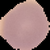

[0]
uninfected
[[3.0489496e-06 9.9999690e-01]]


'--------------------------------------------------------------------------------------------------------------------'

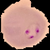

[1]
parasite
[[0.525233   0.47476706]]


'--------------------------------------------------------------------------------------------------------------------'

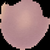

[0]
uninfected
[[0.09198474 0.90801525]]


'--------------------------------------------------------------------------------------------------------------------'

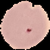

[1]
parasite
[[0.8764518  0.12354822]]


'--------------------------------------------------------------------------------------------------------------------'

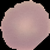

[0]
uninfected
[[1.690748e-08 1.000000e+00]]


'--------------------------------------------------------------------------------------------------------------------'

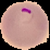

[1]
parasite
[[9.9999726e-01 2.7873359e-06]]


'--------------------------------------------------------------------------------------------------------------------'

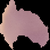

[0]
uninfected
[[0.92315716 0.07684287]]


'--------------------------------------------------------------------------------------------------------------------'

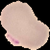

[0]
uninfected
[[0.92315716 0.07684287]]


'--------------------------------------------------------------------------------------------------------------------'

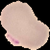

[0]
uninfected


In [160]:
%matplotlib inline

from tensorflow.keras.applications.mobilenet import preprocess_input


from PIL import Image, ImageFile



image_test_malaria = os.listdir('../cell-images-for-detecting-malaria/cell_images/image_test_malaria/')

images = [
    "../cell-images-for-detecting-malaria/cell_images/image_test_malaria/C1_thinF_IMG_20150604_104722_cell_9.png",
    "../cell-images-for-detecting-malaria/cell_images/image_test_malaria/C33P1thinF_IMG_20150619_114756a_cell_179.png",
    "../cell-images-for-detecting-malaria/cell_images/image_test_malaria/C1_thinF_IMG_20150604_104722_cell_15.png",
    "../cell-images-for-detecting-malaria/cell_images/image_test_malaria/C33P1thinF_IMG_20150619_114756a_cell_180.png",
    "../cell-images-for-detecting-malaria/cell_images/image_test_malaria/C1_thinF_IMG_20150604_104722_cell_60.png",
    "../cell-images-for-detecting-malaria/cell_images/image_test_malaria/C33P1thinF_IMG_20150619_114756a_cell_181.png",
    "../cell-images-for-detecting-malaria/cell_images/image_test_malaria/C1_thinF_IMG_20150604_104722_cell_66.png",
    "../cell-images-for-detecting-malaria/cell_images/image_test_malaria/C33P1thinF_IMG_20150619_114756a_cell_182.png",    "../cell-images-for-detecting-malaria/cell_images/image_test_malaria/C33P1thinF_IMG_20150619_114756a_cell_182.png",

]
for pic in images:
    x=[]
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    img = Image.open(pic)
    img.load()
    img = img.resize((50,50), Image.ANTIALIAS)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    pred = model.predict(x)
    print(pred)
    display ("--------------------------------------------------------------------------------------------------------------------")
    display(img)
    labels = ["uninfected","parasite"]
    print(np.argmax(pred,axis=1))
    print(labels[np.argmax(pred,axis=1)[0]])
#     list = decode_predictions(pred, top=5)
#     for item in list[0]:
#           print(itm)    ---------------cant do this one here-------------------------------